## The purpose of this file
**Remove search tag** and more node, if necessary, from the original aam to make optimization feasible.<br>
Make an **modified aggregate adjacency matrix** and save it.

In [1]:
import sys
sys.path.append('../')
import powerlaw
import networkx as nx
import toolbox as tb
%matplotlib inline

In [2]:
tag = "momiji"
hashtag = "紅葉" # This variable is necessary for data processing in the module 'toolbox'.
timespan = "22-22"
tau = 66
G = nx.read_graphml(f'../data/graph_data/{tag}/original/{hashtag}_{timespan}_{tau}_aam.graphml')

In [3]:
ag = tb.AggregateNetwork(G, tau, hashtag)

In [4]:
ag.tau, ag.searchtag, ag.G.number_of_nodes()

(66, '紅葉', 13726)

In [5]:
# Check hubs
ag.check_degree()

isolate:[]


,degree
紅葉,13725
秋,3192
紅葉狩り,2150
写真好きな人と繋がりたい,2010
autumn,1991
...,...
北海道大学,1
東京江戸たてもの園,1
静寂の中で,1
風車,1


In [6]:
ag.remove_searchtag()

Isolates after removal of the searchtag: 
['風車', '岐阜女子大学', '大宮氷川神社参道', '冬がはじまるよ', 'まだ真っ赤じゃなかった', 'いばらきガーデンオーチャードツーリズム', '霞間ケ渓', '清水坂公園', '熊本県阿蘇市赤水', 'スポーツスターｓ', '北海道大学', '上田城跡公園', '静寂の中で', '東京江戸たてもの園', '航空公園']
These isolate nodes are to be removed.
The isolate nodes were successfully deleted.


In [7]:
# Check hubs
ag.check_degree()

isolate:[]


,degree
秋,3191
紅葉狩り,2149
写真好きな人と繋がりたい,2009
autumn,1990
もみじ,1972
...,...
別所沼公園,1
うきは,1
いわき市⁡,1
浄善寺,1


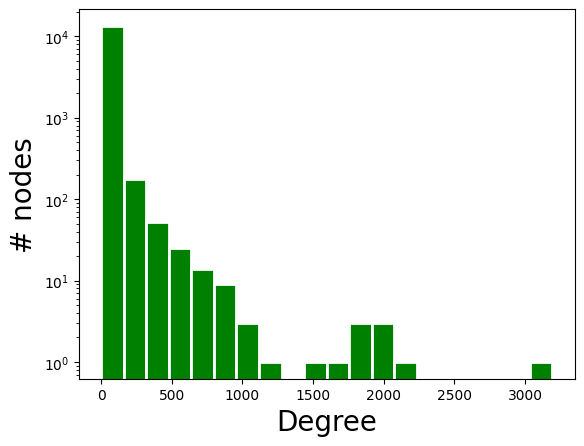

In [8]:
ag.plot_dd(20)

In [9]:
tb.fit_power_law(G)

Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.404286018802643, 
its standard error sigma: 0.03219112673330549, 
k_min: 41.0


(2.404286018802643, 0.03219112673330549, 41.0)

In [10]:
tb.compare_distribution(G,"power_law", "exponential")

Calculating best minimal value for power law fit
------------------------------------------------
The power_law distribution outperforms exponential distribution with significance level 3.650835618750918e-18.


In [11]:
tb.compare_distribution(G,"power_law", "lognormal")

Calculating best minimal value for power law fit
------------------------------------------------
The lognormal distribution outperforms power_law distribution with significance level 0.5551851554695473.


In [12]:
# Save figure for future use
fname1 = f"../data/figure/degree_distribution/pdfccdf1_{tag}_{timespan}_{tau}.pdf"
fname2 = f"../data/figure/degree_distribution/pdfccdf2_{tag}_{timespan}_{tau}.pdf"
print(fname1)
print(fname2)

../data/figure/degree_distribution/pdfccdf1_momiji_22-22_66.pdf
../data/figure/degree_distribution/pdfccdf2_momiji_22-22_66.pdf


Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.404286018802643, 
its standard error sigma: 0.03219112673330549, 
k_min: 41.0


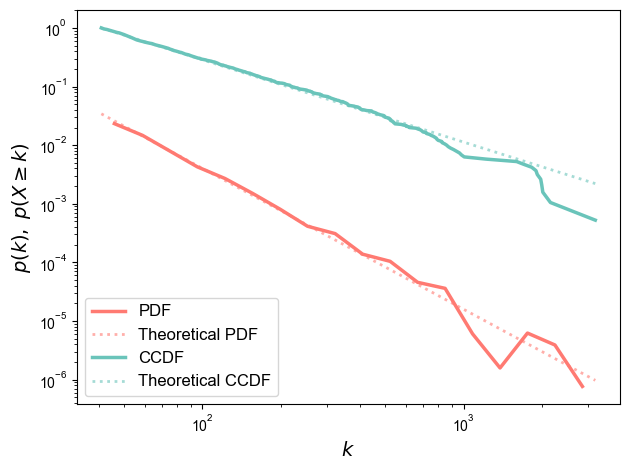

In [13]:
tb.plot_pdf_ccdf(G, Pcolor="#FF7A72", Ccolor="#6AC4BA", fname=fname1)

Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.404286018802643, 
its standard error sigma: 0.03219112673330549, 
k_min: 41.0


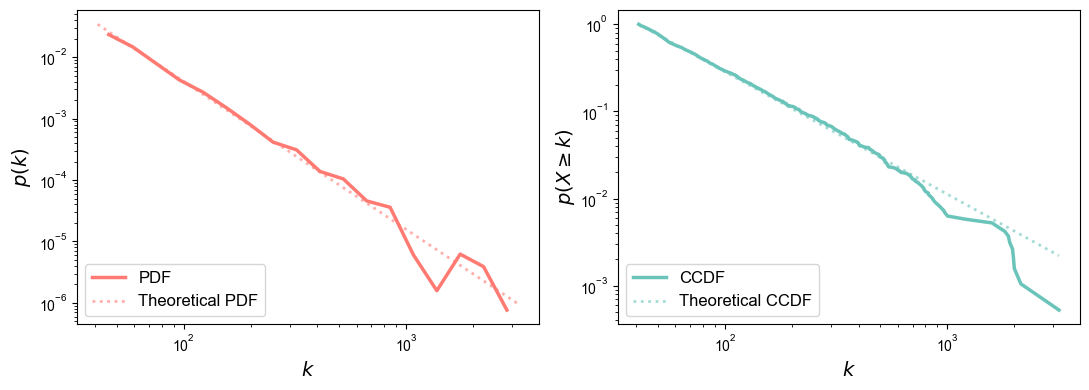

In [14]:
tb.plot_pdf_ccdf(G, sep=True, Pcolor="#FF7A72", Ccolor="#6AC4BA", fname=fname2)

In [15]:
# Save modified aam for statistical test
nx.write_graphml(ag.G, f'../data/graph_data/{tag}/modified/{hashtag}_{timespan}_{tau}_mdaam.graphml', encoding='utf-8')